In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report  
from sklearn.metrics import confusion_matrix

In [2]:
# loading bank data 
bank = pd.read_csv("C:/Users/navee/OneDrive/Desktop/Data Science Assignments/Assignment 6 - Logistic Regression/bank-full.csv",sep=';')
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [3]:
# converting all yes/no to 1/0
bank.y.replace(('yes','no'),(1,0),inplace=True)
bank.default.replace(('yes','no'),(1,0),inplace=True)
bank.housing.replace(('yes','no'),(1,0),inplace=True)
bank.loan.replace(('yes','no'),(1,0),inplace=True)

In [4]:
# creating dummies for object data
bank = pd.get_dummies(bank)
bank.head(5)

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,58,0,2143,1,0,5,261,1,-1,0,...,0,0,1,0,0,0,0,0,0,1
1,44,0,29,1,0,5,151,1,-1,0,...,0,0,1,0,0,0,0,0,0,1
2,33,0,2,1,1,5,76,1,-1,0,...,0,0,1,0,0,0,0,0,0,1
3,47,0,1506,1,0,5,92,1,-1,0,...,0,0,1,0,0,0,0,0,0,1
4,33,0,1,0,0,5,198,1,-1,0,...,0,0,1,0,0,0,0,0,0,1


In [5]:
#Checking for na values
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 49 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   age                  45211 non-null  int64
 1   default              45211 non-null  int64
 2   balance              45211 non-null  int64
 3   housing              45211 non-null  int64
 4   loan                 45211 non-null  int64
 5   day                  45211 non-null  int64
 6   duration             45211 non-null  int64
 7   campaign             45211 non-null  int64
 8   pdays                45211 non-null  int64
 9   previous             45211 non-null  int64
 10  y                    45211 non-null  int64
 11  job_admin.           45211 non-null  uint8
 12  job_blue-collar      45211 non-null  uint8
 13  job_entrepreneur     45211 non-null  uint8
 14  job_housemaid        45211 non-null  uint8
 15  job_management       45211 non-null  uint8
 16  job_retired          4

In [6]:
# checking for duplicates
bank[bank.duplicated()]

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown


In [7]:
# plotting the data set

<AxesSubplot:xlabel='y'>

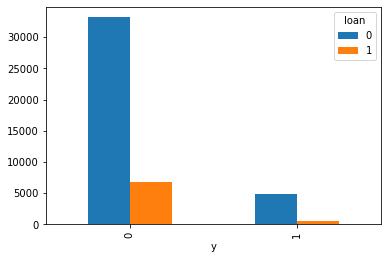

In [8]:
pd.crosstab(bank.y,bank.loan).plot(kind = 'bar')  

<AxesSubplot:xlabel='y'>

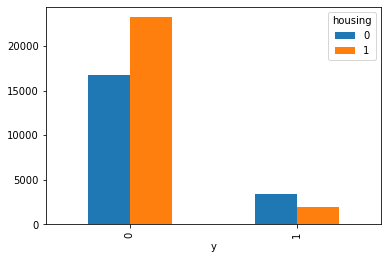

In [9]:
pd.crosstab(bank.y,bank.housing ).plot(kind = 'bar')  

<AxesSubplot:xlabel='housing', ylabel='count'>

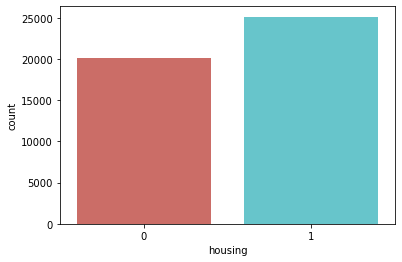

In [10]:
sns.countplot(x="housing",data=bank,palette="hls") 

<AxesSubplot:xlabel='y'>

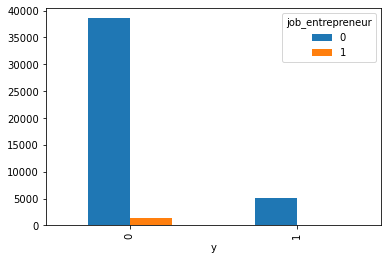

In [11]:
pd.crosstab(bank.y,bank.job_entrepreneur).plot(kind = 'bar')  

<AxesSubplot:xlabel='y'>

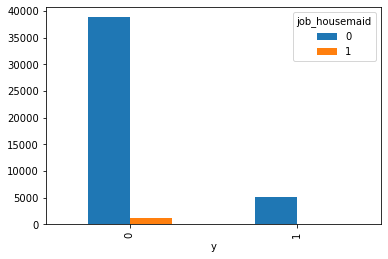

In [12]:
pd.crosstab(bank.y,bank.job_housemaid ).plot(kind = 'bar')  

In [13]:
#Dividing the dataset into X and Y variables
X = bank.loc[:,bank.columns!='y']
Y = np.ravel(bank.loc[:,bank.columns=='y'])

In [14]:
X

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,58,0,2143,1,0,5,261,1,-1,0,...,0,0,1,0,0,0,0,0,0,1
1,44,0,29,1,0,5,151,1,-1,0,...,0,0,1,0,0,0,0,0,0,1
2,33,0,2,1,1,5,76,1,-1,0,...,0,0,1,0,0,0,0,0,0,1
3,47,0,1506,1,0,5,92,1,-1,0,...,0,0,1,0,0,0,0,0,0,1
4,33,0,1,0,0,5,198,1,-1,0,...,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,0,825,0,0,17,977,3,-1,0,...,0,0,0,1,0,0,0,0,0,1
45207,71,0,1729,0,0,17,456,2,-1,0,...,0,0,0,1,0,0,0,0,0,1
45208,72,0,5715,0,0,17,1127,5,184,3,...,0,0,0,1,0,0,0,0,1,0
45209,57,0,668,0,0,17,508,4,-1,0,...,0,0,0,1,0,0,0,0,0,1


In [15]:
Y

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [16]:
# Model building 
model = LogisticRegression()
model.fit(X,Y)

C:\Users\navee\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [17]:
model.coef_  # coefficients of features   

array([[-2.40001362e-02, -1.95894745e-02,  2.16437010e-05,
        -7.16637839e-01, -2.06125399e-01, -1.16824613e-03,
         3.87076008e-03, -4.22186810e-01,  2.87273256e-03,
        -1.11266700e-01, -2.90021124e-02, -2.71630601e-01,
        -2.87707666e-02, -9.22690819e-03,  7.20166468e-03,
         1.77503327e-01, -1.70572156e-02, -9.52356210e-02,
         3.20311801e-02, -7.48179847e-02,  3.17850835e-03,
         2.64717685e-03,  1.75197964e-02, -1.85609543e-01,
        -1.35089606e-01, -7.44991716e-02, -2.92546135e-01,
         4.92913915e-02,  1.45745620e-02,  9.82420195e-02,
         5.40784765e-02, -4.55499849e-01,  4.40777149e-02,
         2.53547828e-02,  3.06974424e-02, -1.55341277e-02,
        -1.38722584e-02, -8.77879443e-02, -5.90718811e-02,
         9.25198948e-02, -4.44776869e-01, -5.99892231e-02,
         1.05527727e-01,  7.96753894e-02, -1.43888177e-01,
        -3.37657440e-02,  3.32637210e-01, -4.58162641e-01]])

In [18]:
#Predict for X dataset
y_pred = model.predict(X)
y_pred

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [19]:
bank["y_pred"] = y_pred
bank.head(5)

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,...,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown,y_pred
0,58,0,2143,1,0,5,261,1,-1,0,...,0,1,0,0,0,0,0,0,1,0
1,44,0,29,1,0,5,151,1,-1,0,...,0,1,0,0,0,0,0,0,1,0
2,33,0,2,1,1,5,76,1,-1,0,...,0,1,0,0,0,0,0,0,1,0
3,47,0,1506,1,0,5,92,1,-1,0,...,0,1,0,0,0,0,0,0,1,0
4,33,0,1,0,0,5,198,1,-1,0,...,0,1,0,0,0,0,0,0,1,0


In [20]:
y_pred_df= pd.DataFrame({'actual': Y,'predicted_prob': y_pred})
y_pred_df.head()

,actual,predicted_prob
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0


In [21]:
y_prob = pd.DataFrame(model.predict_proba(X.iloc[:,:]))
new_df = pd.concat([bank,y_prob],axis=1)
new_df.head()

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,...,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown,y_pred,0,1
0,58,0,2143,1,0,5,261,1,-1,0,...,0,0,0,0,0,0,1,0,0.963514,0.036486
1,44,0,29,1,0,5,151,1,-1,0,...,0,0,0,0,0,0,1,0,0.977742,0.022258
2,33,0,2,1,1,5,76,1,-1,0,...,0,0,0,0,0,0,1,0,0.982364,0.017636
3,47,0,1506,1,0,5,92,1,-1,0,...,0,0,0,0,0,0,1,0,0.981857,0.018143
4,33,0,1,0,0,5,198,1,-1,0,...,0,0,0,0,0,0,1,0,0.903435,0.096565


In [22]:
# Confusion Matrix for the model accuracy
confusion_matrix = confusion_matrix(Y,y_pred)
print (confusion_matrix)

[[39135   787]
 [ 4100  1189]]


In [23]:
pd.crosstab(Y,y_pred)  

col_0,0,1
row_0,,
0,39135,787
1,4100,1189


In [24]:
#type(y_pred)
accuracy = sum(Y==y_pred)/bank.shape[0]
accuracy 

0.8919068368317444

In [25]:
#Classification report
print(classification_report(Y,y_pred))

              precision    recall  f1-score   support

           0       0.91      0.98      0.94     39922
           1       0.60      0.22      0.33      5289

    accuracy                           0.89     45211
   macro avg       0.75      0.60      0.63     45211
weighted avg       0.87      0.89      0.87     45211



In [26]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
Logit_roc_score=roc_auc_score(Y,model.predict(X))
Logit_roc_score  

0.6025463801700137

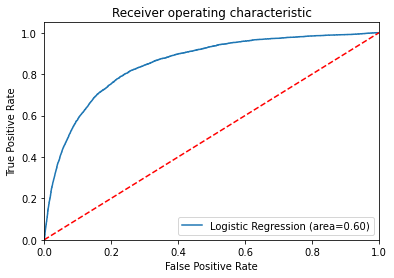

In [27]:
# plotting ROC curve
fpr, tpr, thresholds = roc_curve(Y,model.predict_proba(X)[:,1]) 
plt.plot(fpr, tpr, label='Logistic Regression (area=%0.2f)'% Logit_roc_score)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()   

In [29]:
import statsmodels.api as sm  
logit = sm.Logit(Y, X)   
logit.fit().summary()  

         Current function value: 0.238463
         Iterations: 35


C:\Users\navee\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                45211
Model:                          Logit   Df Residuals:                    45168
Method:                           MLE   Df Model:                           42
Date:                Sun, 21 Feb 2021   Pseudo R-squ.:                  0.3392
Time:                        00:12:27   Log-Likelihood:                -10781.
converged:                      False   LL-Null:                       -16315.
Covariance Type:            nonrobust   LLR p-value:                     0.000
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
age                     0.0001      0.002      0.051      0.959      -0.004       0.004
default                -0.0167      0.163     -0.102      0.918      -0.336       0.302
balance              1.284e-05   5.15e-06      2.493      0.013    2.75e-06    2.29e-05
housing                -0.6754      0.044    -15.395      0.000      -0.761      -0.589
loan                   -0.4254      0.060     -7.091      0.000      -0.543      -0.308
day                     0.0100      0.002      3.993      0.000       0.005       0.015
duration                0.0042   6.45e-05     64.985      0.000       0.004       0.004
campaign               -0.0908      0.010     -8.955      0.000      -0.111      -0.071
pdays                  -0.0001      0.000     -0.335      0.737      -0.001       0.000
previous                0.0102      0.007      1.561      0.118      -0.003       0.023
job_admin.              0.0019   1.48e+06   1.25e-09      1.000   -2.91e+06    2.91e+06
job_blue-collar        -0.3080   1.49e+06  -2.07e-07      1.000   -2.92e+06    2.92e+06
job_entrepreneur       -0.3552   1.49e+06  -2.38e-07      1.000   -2.92e+06    2.92e+06
job_housemaid          -0.5021   1.48e+06  -3.39e-07      1.000    -2.9e+06     2.9e+06
job_management         -0.1634   1.45e+06  -1.13e-07      1.000   -2.84e+06    2.84e+06
job_retired             0.2542   1.49e+06   1.71e-07      1.000   -2.91e+06    2.91e+06
job_self-employed      -0.2965   1.46e+06  -2.03e-07      1.000   -2.86e+06    2.86e+06
job_services           -0.2219    1.5e+06  -1.48e-07      1.000   -2.93e+06    2.93e+06
job_student             0.3840   1.44e+06   2.67e-07      1.000   -2.82e+06    2.82e+06
job_technician         -0.1742    1.5e+06  -1.16e-07      1.000   -2.94e+06    2.94e+06
job_unemployed         -0.1749    1.5e+06  -1.16e-07      1.000   -2.94e+06    2.94e+06
job_unknown            -0.3114    1.5e+06  -2.07e-07      1.000   -2.95e+06    2.95e+06
marital_divorced       -0.5935   8.06e+05  -7.36e-07      1.000   -1.58e+06    1.58e+06
marital_married        -0.7730   8.08e+05  -9.56e-07      1.000   -1.58e+06    1.58e+06
marital_single         -0.5010   8.23e+05  -6.09e-07      1.000   -1.61e+06    1.61e+06
education_primary      -0.6701        nan        nan        nan         nan         nan
education_secondary    -0.4866        nan        nan        nan         nan         nan
education_tertiary     -0.2912        nan        nan        nan         nan         nan
education_unknown      -0.4196        nan        nan        nan         nan         nan
contact_cellular       -0.0270        nan        nan        nan         nan         nan
contact_telephone      -0.1904        nan        nan        nan         nan         nan
contact_unknown        -1.6502        nan        nan        nan         nan         nan
month_apr              -0.1793        nan        nan        nan         nan         nan
month_aug              -0.8732        nan        nan        nan         n